In [11]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

#### 定义目标函数

In [18]:
def target_func(x):
    return torch.abs(x) + 0.3 * torch.sin(20*x)

#### 生成数据集

In [21]:
x_train = torch.linspace(-3, 3, 1000).view(-1,1)
y_train = target_func(x_train)
x_test = torch.linspace(-3.5,3.5,200).view(-1,1)

#### 构建两层ReLU网络

In [24]:
class ReLUNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(1, 64)  # 隐藏层64个ReLU单元
        self.output = nn.Linear(64, 1)
        
    def forward(self, x):
        x = torch.relu(self.hidden(x))
        return self.output(x)
model = ReLUNet()

#### 训练配置

In [27]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 2000

#### 训练循环

In [30]:
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

#### 验证与可视化

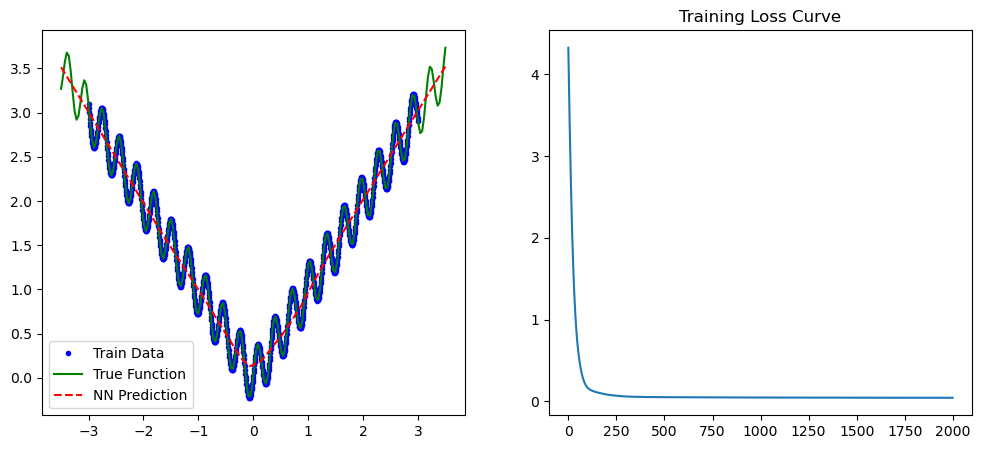

In [33]:
with torch.no_grad():
    y_pred = model(x_test).numpy()
    
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(x_train.numpy(), y_train.numpy(), 'b.', label='Train Data')
plt.plot(x_test.numpy(), target_func(x_test).numpy(), 'g-', label='True Function')
plt.plot(x_test.numpy(), y_pred, 'r--', label='NN Prediction')
plt.legend()

plt.subplot(122)
plt.plot(losses)
plt.title('Training Loss Curve')
plt.show()